```{contents}
```

##  Hyperparameter Tuning

### Gradient Boosting Regressor

Hyperparameters control **model complexity, learning speed, and generalization**. Key ones:

| Hyperparameter      | Role / Effect                                                                                  |
| ------------------- | ---------------------------------------------------------------------------------------------- |
| `n_estimators`      | Number of weak learners (trees). Too high → overfitting; too low → underfitting.               |
| `learning_rate`     | Shrinkage factor applied to each tree. Smaller → slower learning, reduces overfitting.         |
| `max_depth`         | Maximum depth of each tree. Higher depth → more complex trees → risk of overfitting.           |
| `min_samples_split` | Minimum samples required to split a node. Higher → simpler trees → prevents overfitting.       |
| `min_samples_leaf`  | Minimum samples required at a leaf. Higher → prevents overfitting.                             |
| `subsample`         | Fraction of data used for each tree (stochastic gradient boosting). Reduces variance.          |
| `max_features`      | Max features considered at each split. Reduces correlation between trees, reduces overfitting. |
| `loss`              | Loss function (MSE, MAE, Huber). Controls sensitivity to outliers.                             |

---

#### **Hyperparameter Tuning Strategies**

1. **Grid Search**

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
```

2. **Randomized Search** – faster for large grids, samples combinations randomly.
3. **Early Stopping** – monitor validation error to stop adding trees automatically:

```python
gbr = GradientBoostingRegressor(n_estimators=1000, validation_fraction=0.1,
                                n_iter_no_change=10, tol=1e-4)
gbr.fit(X_train, y_train)
```

---

#### 3. **Handling Overfitting**

Signs: training error is much lower than validation error.

**Strategies:**

1. Reduce `n_estimators` or `max_depth`.
2. Increase `min_samples_split` / `min_samples_leaf`.
3. Reduce `learning_rate` and increase `n_estimators` (slower, smoother learning).
4. Use `subsample < 1.0` (stochastic gradient boosting).
5. Limit `max_features` to reduce tree correlation.
6. Use early stopping with validation set.

---

#### 4. **Handling Underfitting**

Signs: both training and validation errors are high.

**Strategies:**

1. Increase `n_estimators` (more trees).
2. Increase `max_depth` (more complex trees).
3. Reduce `min_samples_split` / `min_samples_leaf` (allows finer splits).
4. Increase `learning_rate` to allow faster learning.
5. Ensure sufficient features in `max_features`.

---

#### 5. **Workflow for Tuning GBR**

1. Start with **shallow trees** (`max_depth=2-3`) and small `learning_rate=0.05-0.1`.
2. Increase `n_estimators` gradually, monitor validation error.
3. If overfitting occurs → reduce depth, increase `min_samples_leaf`, decrease `learning_rate`, or use `subsample`.
4. If underfitting → increase depth, increase `learning_rate`, increase `n_estimators`.
5. Use cross-validation for **robust parameter selection**.

---

**Key Intuition**

* **Learning rate vs n\_estimators**: smaller learning rate + more trees → smoother learning, lower risk of overfitting.
* **Tree complexity**: deeper trees → fit training data closely → risk of overfitting.
* **Stochastic subsampling**: reduces variance, improves generalization.

### Demonstration

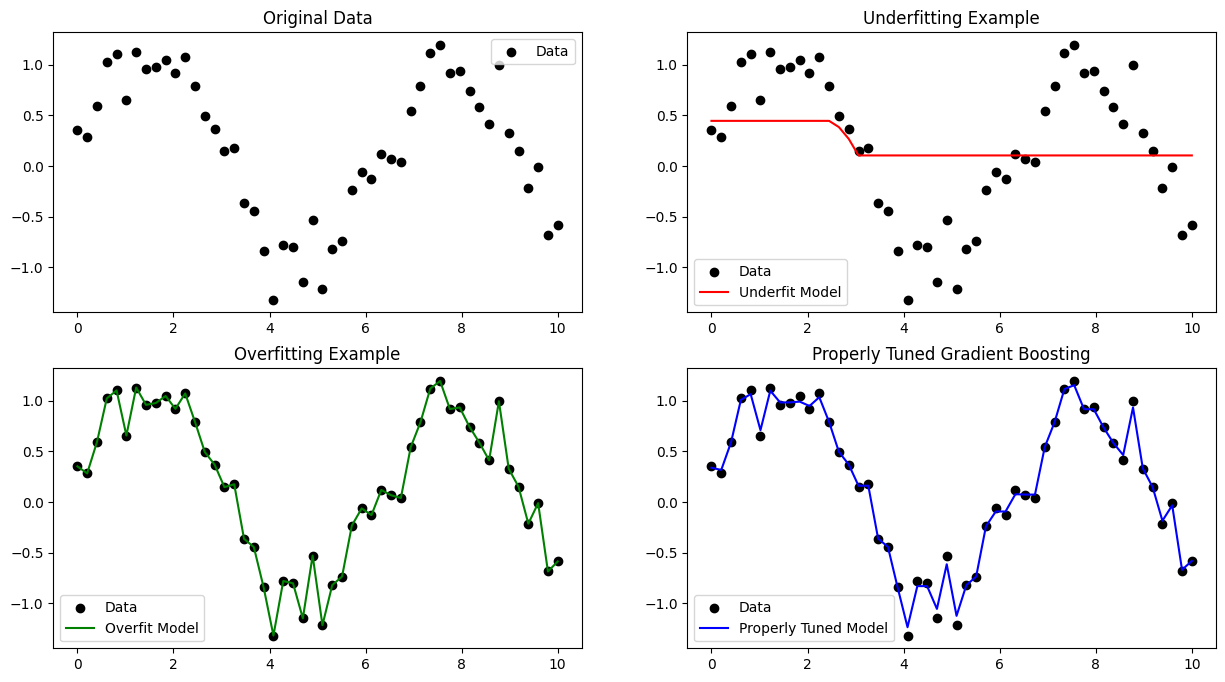

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# -------------------------------
# Create a synthetic dataset
# -------------------------------
np.random.seed(0)
X = np.linspace(0, 10, 50).reshape(-1,1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # noisy sine wave
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.scatter(X, y, color='black', label='Data')
plt.title("Original Data")
plt.legend()

# -------------------------------
# Underfitting example
# -------------------------------
gbr_under = GradientBoostingRegressor(n_estimators=10, max_depth=1, learning_rate=0.05)
gbr_under.fit(X, y)
y_pred_under = gbr_under.predict(X)

plt.subplot(2,2,2)
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred_under, color='red', label='Underfit Model')
plt.title("Underfitting Example")
plt.legend()


# -------------------------------
# Overfitting example
# -------------------------------
gbr_over = GradientBoostingRegressor(n_estimators=500, max_depth=5, learning_rate=0.2)
gbr_over.fit(X, y)
y_pred_over = gbr_over.predict(X)
plt.subplot(2,2,3)
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred_over, color='green', label='Overfit Model')
plt.title("Overfitting Example")
plt.legend()


# -------------------------------
# Properly tuned example
# -------------------------------
gbr_tuned = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gbr_tuned.fit(X, y)
y_pred_tuned = gbr_tuned.predict(X)
plt.subplot(2,2,4)
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred_tuned, color='blue', label='Properly Tuned Model')
plt.title("Properly Tuned Gradient Boosting")
plt.legend()
plt.show()



### Interpretation

1. **Underfitting** (`n_estimators=10`, `max_depth=1`, `learning_rate=0.05`)

   * Model is too simple → cannot capture sine wave pattern.
   * Both training and test errors are high.

2. **Overfitting** (`n_estimators=500`, `max_depth=5`, `learning_rate=0.2`)

   * Model is too complex → fits noise in training data.
   * Low training error, high validation error.

3. **Properly tuned** (`n_estimators=100`, `max_depth=3`, `learning_rate=0.1`)

   * Balanced complexity → captures main pattern without fitting noise.
   * Best generalization.



### Gradient Boosting Classifier

Here’s a detailed explanation for **Gradient Boosting Classifier (GBC)** regarding **hyperparameter tuning**, **overfitting**, and **underfitting**:

---

| Hyperparameter      | Role / Effect                                                                                        |
| ------------------- | ---------------------------------------------------------------------------------------------------- |
| `n_estimators`      | Number of weak learners (trees). Too high → overfitting; too low → underfitting.                     |
| `learning_rate`     | Shrinkage factor applied to each tree. Smaller → slower learning, reduces overfitting.               |
| `max_depth`         | Maximum depth of each tree. Higher depth → more complex trees → risk of overfitting.                 |
| `min_samples_split` | Minimum samples required to split a node. Higher → simpler trees → prevents overfitting.             |
| `min_samples_leaf`  | Minimum samples required at a leaf. Higher → prevents overfitting.                                   |
| `subsample`         | Fraction of data used for each tree (stochastic gradient boosting). Reduces variance.                |
| `max_features`      | Max features considered at each split. Reduces correlation between trees, reduces overfitting.       |
| `loss`              | Loss function (`deviance` = logistic loss for classification). Controls how tree fits probabilities. |

---

#### 2. **Hyperparameter Tuning Strategies**

1. **Grid Search**

```python
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
```

2. **Randomized Search** – faster for large grids, samples combinations randomly.
3. **Early Stopping** – stop adding trees when validation accuracy stops improving:

```python
gbc = GradientBoostingClassifier(n_estimators=1000, validation_fraction=0.1,
                                 n_iter_no_change=10, tol=1e-4)
gbc.fit(X_train, y_train)
```

---

#### 3. **Handling Overfitting**

Signs: training accuracy is high, validation accuracy is low.

**Strategies:**

1. Reduce `max_depth` or `n_estimators`.
2. Reduce `learning_rate` and increase `n_estimators`.
3. Increase `min_samples_split` or `min_samples_leaf`.
4. Use `subsample < 1.0` to train each tree on a subset.
5. Limit `max_features` to reduce correlation between trees.
6. Use early stopping on a validation set.

---

#### 4. **Handling Underfitting**

Signs: both training and validation accuracy are low.

**Strategies:**

1. Increase `n_estimators` to allow more boosting rounds.
2. Increase `max_depth` for more complex trees.
3. Decrease `min_samples_split` / `min_samples_leaf` to allow finer splits.
4. Increase `learning_rate` for faster learning.
5. Include more features by adjusting `max_features`.

---

#### 5. **Workflow for Tuning GBC**

1. Start with **shallow trees** (`max_depth=2-3`) and small `learning_rate=0.05-0.1`.
2. Gradually increase `n_estimators`, monitoring validation accuracy.
3. If overfitting → reduce depth, increase `min_samples_leaf`, decrease `learning_rate`, use `subsample < 1`.
4. If underfitting → increase depth, increase `learning_rate`, increase `n_estimators`.
5. Cross-validation is essential for robust hyperparameter selection.

---

**Key Intuition**

* **Learning rate vs n\_estimators:** smaller learning rate + more trees → slower but smoother learning, reduces overfitting.
* **Tree complexity:** deeper trees → fit training data closely → risk of overfitting.
* **Subsampling:** reduces variance, improves generalization.

### Demonstration

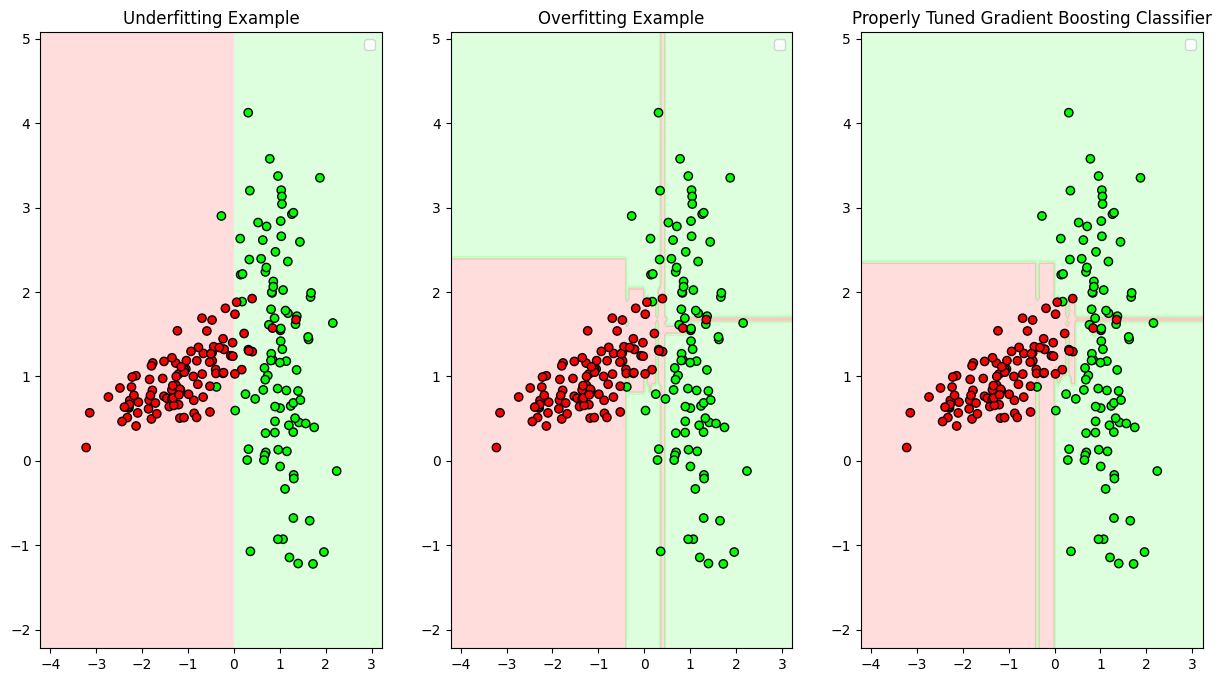

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

# -------------------------------
# Create a synthetic binary dataset
# -------------------------------
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=0)



plt.figure(figsize=(15,8))
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title,axis=(1,1,1)):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(*axis)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.legend()
    

# -------------------------------
# Underfitting example
# -------------------------------
gbc_under = GradientBoostingClassifier(n_estimators=10, max_depth=1, learning_rate=0.05)
gbc_under.fit(X, y)
# plt.subplot(1,3,1)
plot_decision_boundary(gbc_under, X, y, "Underfitting Example",axis=(1,3,1))

# -------------------------------
# Overfitting example
# -------------------------------
gbc_over = GradientBoostingClassifier(n_estimators=500, max_depth=5, learning_rate=0.2)
gbc_over.fit(X, y)
# plt.subplot(1,3,2)
plot_decision_boundary(gbc_over, X, y, "Overfitting Example",axis=(1,3,2))

# -------------------------------
# Properly tuned example
# -------------------------------
gbc_tuned = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
gbc_tuned.fit(X, y)
# plt.subplot(1,3,3)
plot_decision_boundary(gbc_tuned, X, y, "Properly Tuned Gradient Boosting Classifier",axis=(1,3,3))
plt.show()